In [2]:
# Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# load dataframe
df = pd.read_csv("../team_project/eda_data/Unemployment_Hospital_Density_Merge.csv",index_col="COUNTY")
df.head()

,PRECOVID_UNEMPLOYMENT_COUNTS,PRECOVID_UNEMPLOYMENT_RATES,Employment,COVID_UNEMPLOYMENT_COUNTS,COVID_UNEMPLOYMENT_RATES,PRECOVID_RATES,PRECOVID_COUNTS,COVID_RATES,COVID_COUNTS,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA
COUNTY,,,,,,,,,,,,,,,,,,,
Alameda,31383.333333,3.773333,742416.666667,71383.333333,8.825000,3.502,63.0,8.09,144.0,340.0,9074.0,327.0,13.0,2894.0,20.232315,539.964772,0.773588,172.212701,0.017589
Alpine,33.833333,6.070000,460.000000,59.166667,11.925000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Amador,748.000000,5.130000,13105.833333,1317.500000,9.166667,6.556,3.0,13.07,4.0,5.0,251.0,4.0,1.0,52.0,12.362162,620.580527,2.472432,128.566484,0.001682
Butte,6048.333333,5.990000,84083.333333,8508.333333,9.233333,6.900,16.2,11.54,26.0,44.0,1387.0,41.0,3.0,467.0,22.348639,704.490045,1.523771,237.200325,0.001833
Calaveras,1037.166667,4.966667,19588.333333,1620.000000,7.658333,10.566,4.6,7.00,2.0,5.0,124.0,4.0,1.0,25.0,10.794706,267.708716,2.158941,53.973531,0.000980


In [6]:
# statistics of each column
df.describe()

,PRECOVID_UNEMPLOYMENT_COUNTS,PRECOVID_UNEMPLOYMENT_RATES,Employment,COVID_UNEMPLOYMENT_COUNTS,COVID_UNEMPLOYMENT_RATES,PRECOVID_RATES,PRECOVID_COUNTS,COVID_RATES,COVID_COUNTS,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_NOER_FAC,COUNT_ER_FAC,ER_BEDS,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA
count,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,16459.087644,6.237816,2.916036e+05,32897.758621,9.763362,7.047000,40.744828,12.027586,92.913793,143.931034,3610.224138,138.172414,5.741379,1266.293103,18.498336,522.331033,2.490566,189.234635,0.006969
std,36652.198036,3.008081,6.297729e+05,86297.446647,2.471559,4.394006,78.606841,8.527419,203.349521,499.977644,9036.753772,490.070247,10.289767,2981.164055,9.637196,285.484200,3.827761,156.289132,0.028131
min,33.833333,2.723333,4.600000e+02,59.166667,6.766667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1415.083333,4.507083,1.836271e+04,1778.125000,8.118750,4.258500,3.850000,6.450000,4.000000,8.250000,172.000000,7.250000,1.000000,64.500000,12.447112,378.115384,0.744955,129.355708,0.000720
50%,5176.666667,5.738333,7.487083e+04,7695.833333,9.254167,6.222000,13.000000,10.870000,24.500000,27.500000,941.500000,25.000000,2.500000,298.000000,16.176262,487.177013,1.124202,169.626388,0.001193
75%,18021.666667,7.250833,2.772833e+05,28879.166667,10.768750,8.615500,39.500000,15.900000,79.250000,95.500000,3333.500000,89.000000,6.750000,1194.750000,22.609171,614.122250,2.394060,201.725443,0.003692
max,263375.000000,21.620000,4.291675e+06,629816.666667,22.425000,22.304000,457.400000,44.510000,1300.000000,3781.000000,65542.000000,3708.000000,72.000000,20947.000000,66.203244,1856.192962,22.413986,1176.734282,0.213246


In [7]:
# remove No ER facility number
df = df.drop(columns="COUNT_NOER_FAC")

In [8]:
# divide the dataframe into Count variables and Rate/density variables
count_df = df[["PRECOVID_UNEMPLOYMENT_COUNTS","COVID_UNEMPLOYMENT_COUNTS","TOTAL_FAC","TOTAL_NUMBER_BEDS","COUNT_ER_FAC","ER_BEDS"]]
rate_df = df[["PRECOVID_UNEMPLOYMENT_RATES","COVID_UNEMPLOYMENT_RATES","TOTALFAC_PER_POP","TOTALBEDS_PER_POP","ERFAC_PER_POP","ERBEDS_PER_POP","ERFAC_PER_AREA"]]

In [9]:
# correlations of variables in count dataframe
corr = count_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRECOVID_UNEMPLOYMENT_COUNTS,COVID_UNEMPLOYMENT_COUNTS,TOTAL_FAC,TOTAL_NUMBER_BEDS,COUNT_ER_FAC,ER_BEDS
PRECOVID_UNEMPLOYMENT_COUNTS,1.000000,0.994171,0.969919,0.989888,0.978863,0.985235
COVID_UNEMPLOYMENT_COUNTS,0.994171,1.000000,0.983895,0.996766,0.982052,0.991711
TOTAL_FAC,0.969919,0.983895,1.000000,0.980377,0.951415,0.962089
TOTAL_NUMBER_BEDS,0.989888,0.996766,0.980377,1.000000,0.981161,0.994586
COUNT_ER_FAC,0.978863,0.982052,0.951415,0.981161,1.000000,0.988460
ER_BEDS,0.985235,0.991711,0.962089,0.994586,0.988460,1.000000


In [10]:
# correlations of variables in rate dataframe
corr = rate_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRECOVID_UNEMPLOYMENT_RATES,COVID_UNEMPLOYMENT_RATES,TOTALFAC_PER_POP,TOTALBEDS_PER_POP,ERFAC_PER_POP,ERBEDS_PER_POP,ERFAC_PER_AREA
PRECOVID_UNEMPLOYMENT_RATES,1.000000,0.873186,0.063083,-0.097066,0.115897,0.040081,-0.211187
COVID_UNEMPLOYMENT_RATES,0.873186,1.000000,-0.062242,-0.191173,-0.045232,-0.094463,-0.124986
TOTALFAC_PER_POP,0.063083,-0.062242,1.000000,0.483859,0.181574,0.074273,-0.105590
TOTALBEDS_PER_POP,-0.097066,-0.191173,0.483859,1.000000,0.182702,0.388887,0.031583
ERFAC_PER_POP,0.115897,-0.045232,0.181574,0.182702,1.000000,0.793522,-0.088054
ERBEDS_PER_POP,0.040081,-0.094463,0.074273,0.388887,0.793522,1.000000,0.098817
ERFAC_PER_AREA,-0.211187,-0.124986,-0.105590,0.031583,-0.088054,0.098817,1.000000


In [11]:
# function to plot a matrix of scatterplot
def plotting(df):
    g = sns.PairGrid(df)
    g.map(sns.scatterplot)

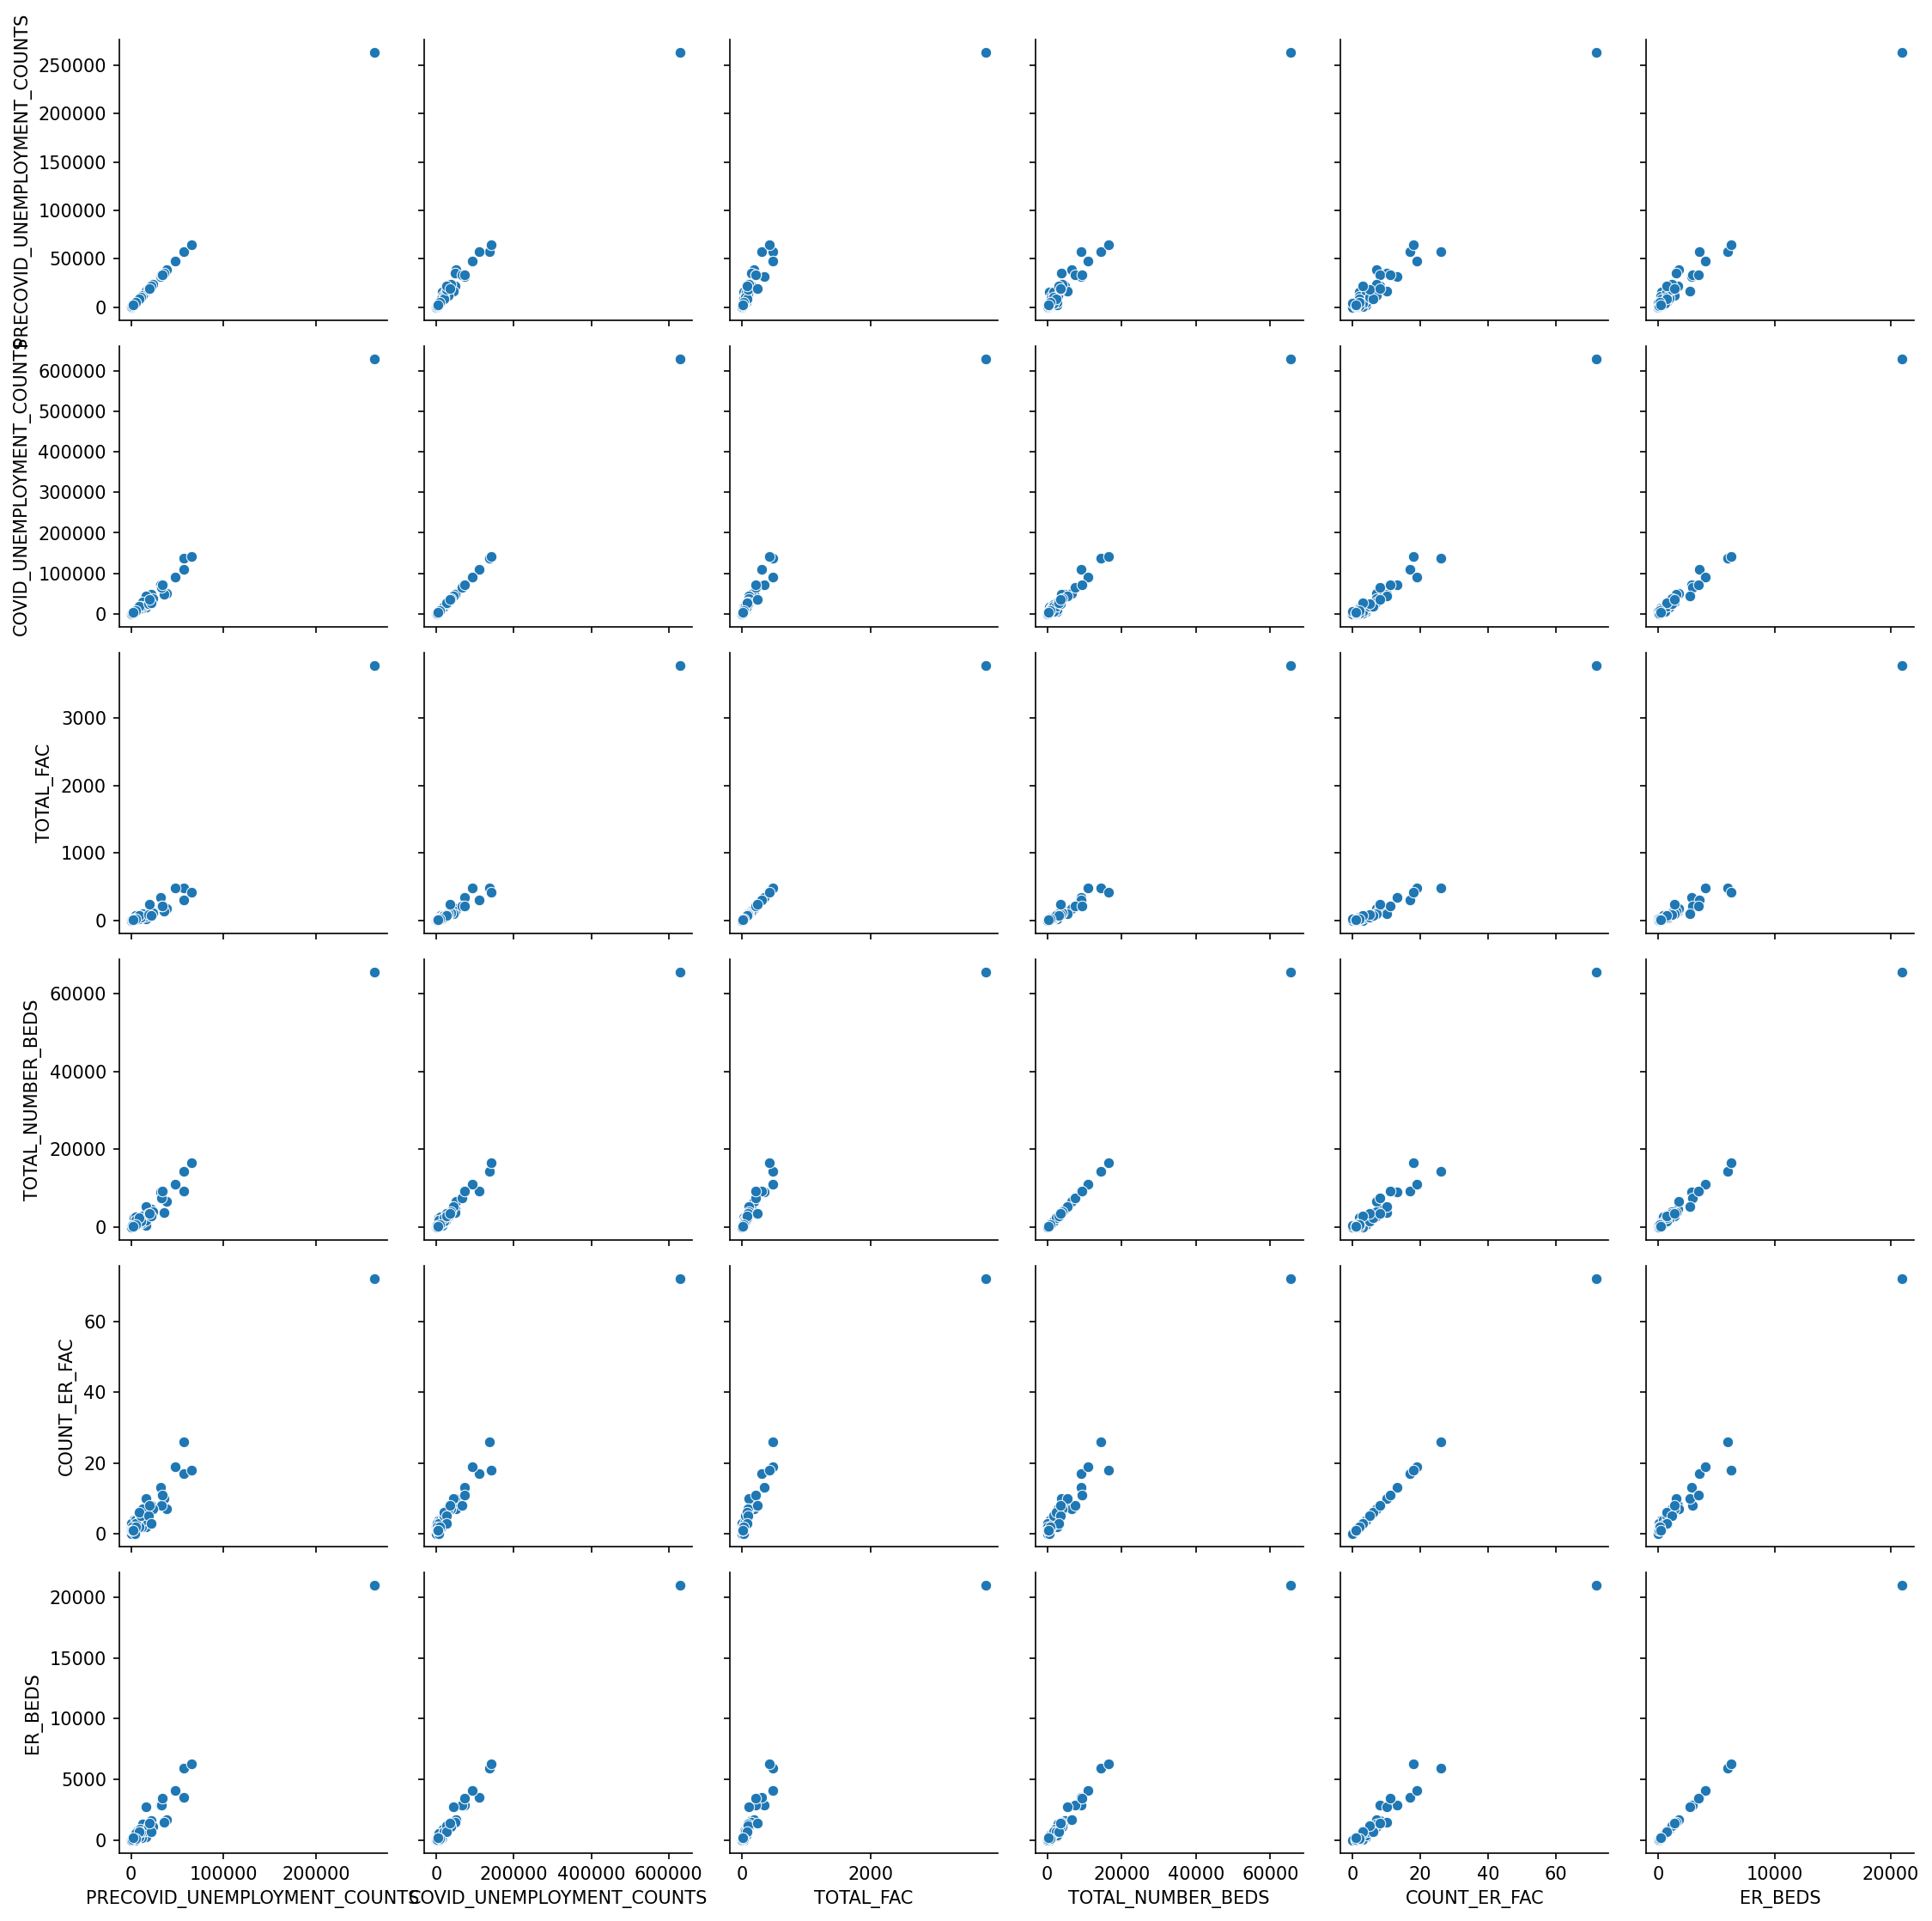

In [12]:
plotting(count_df)

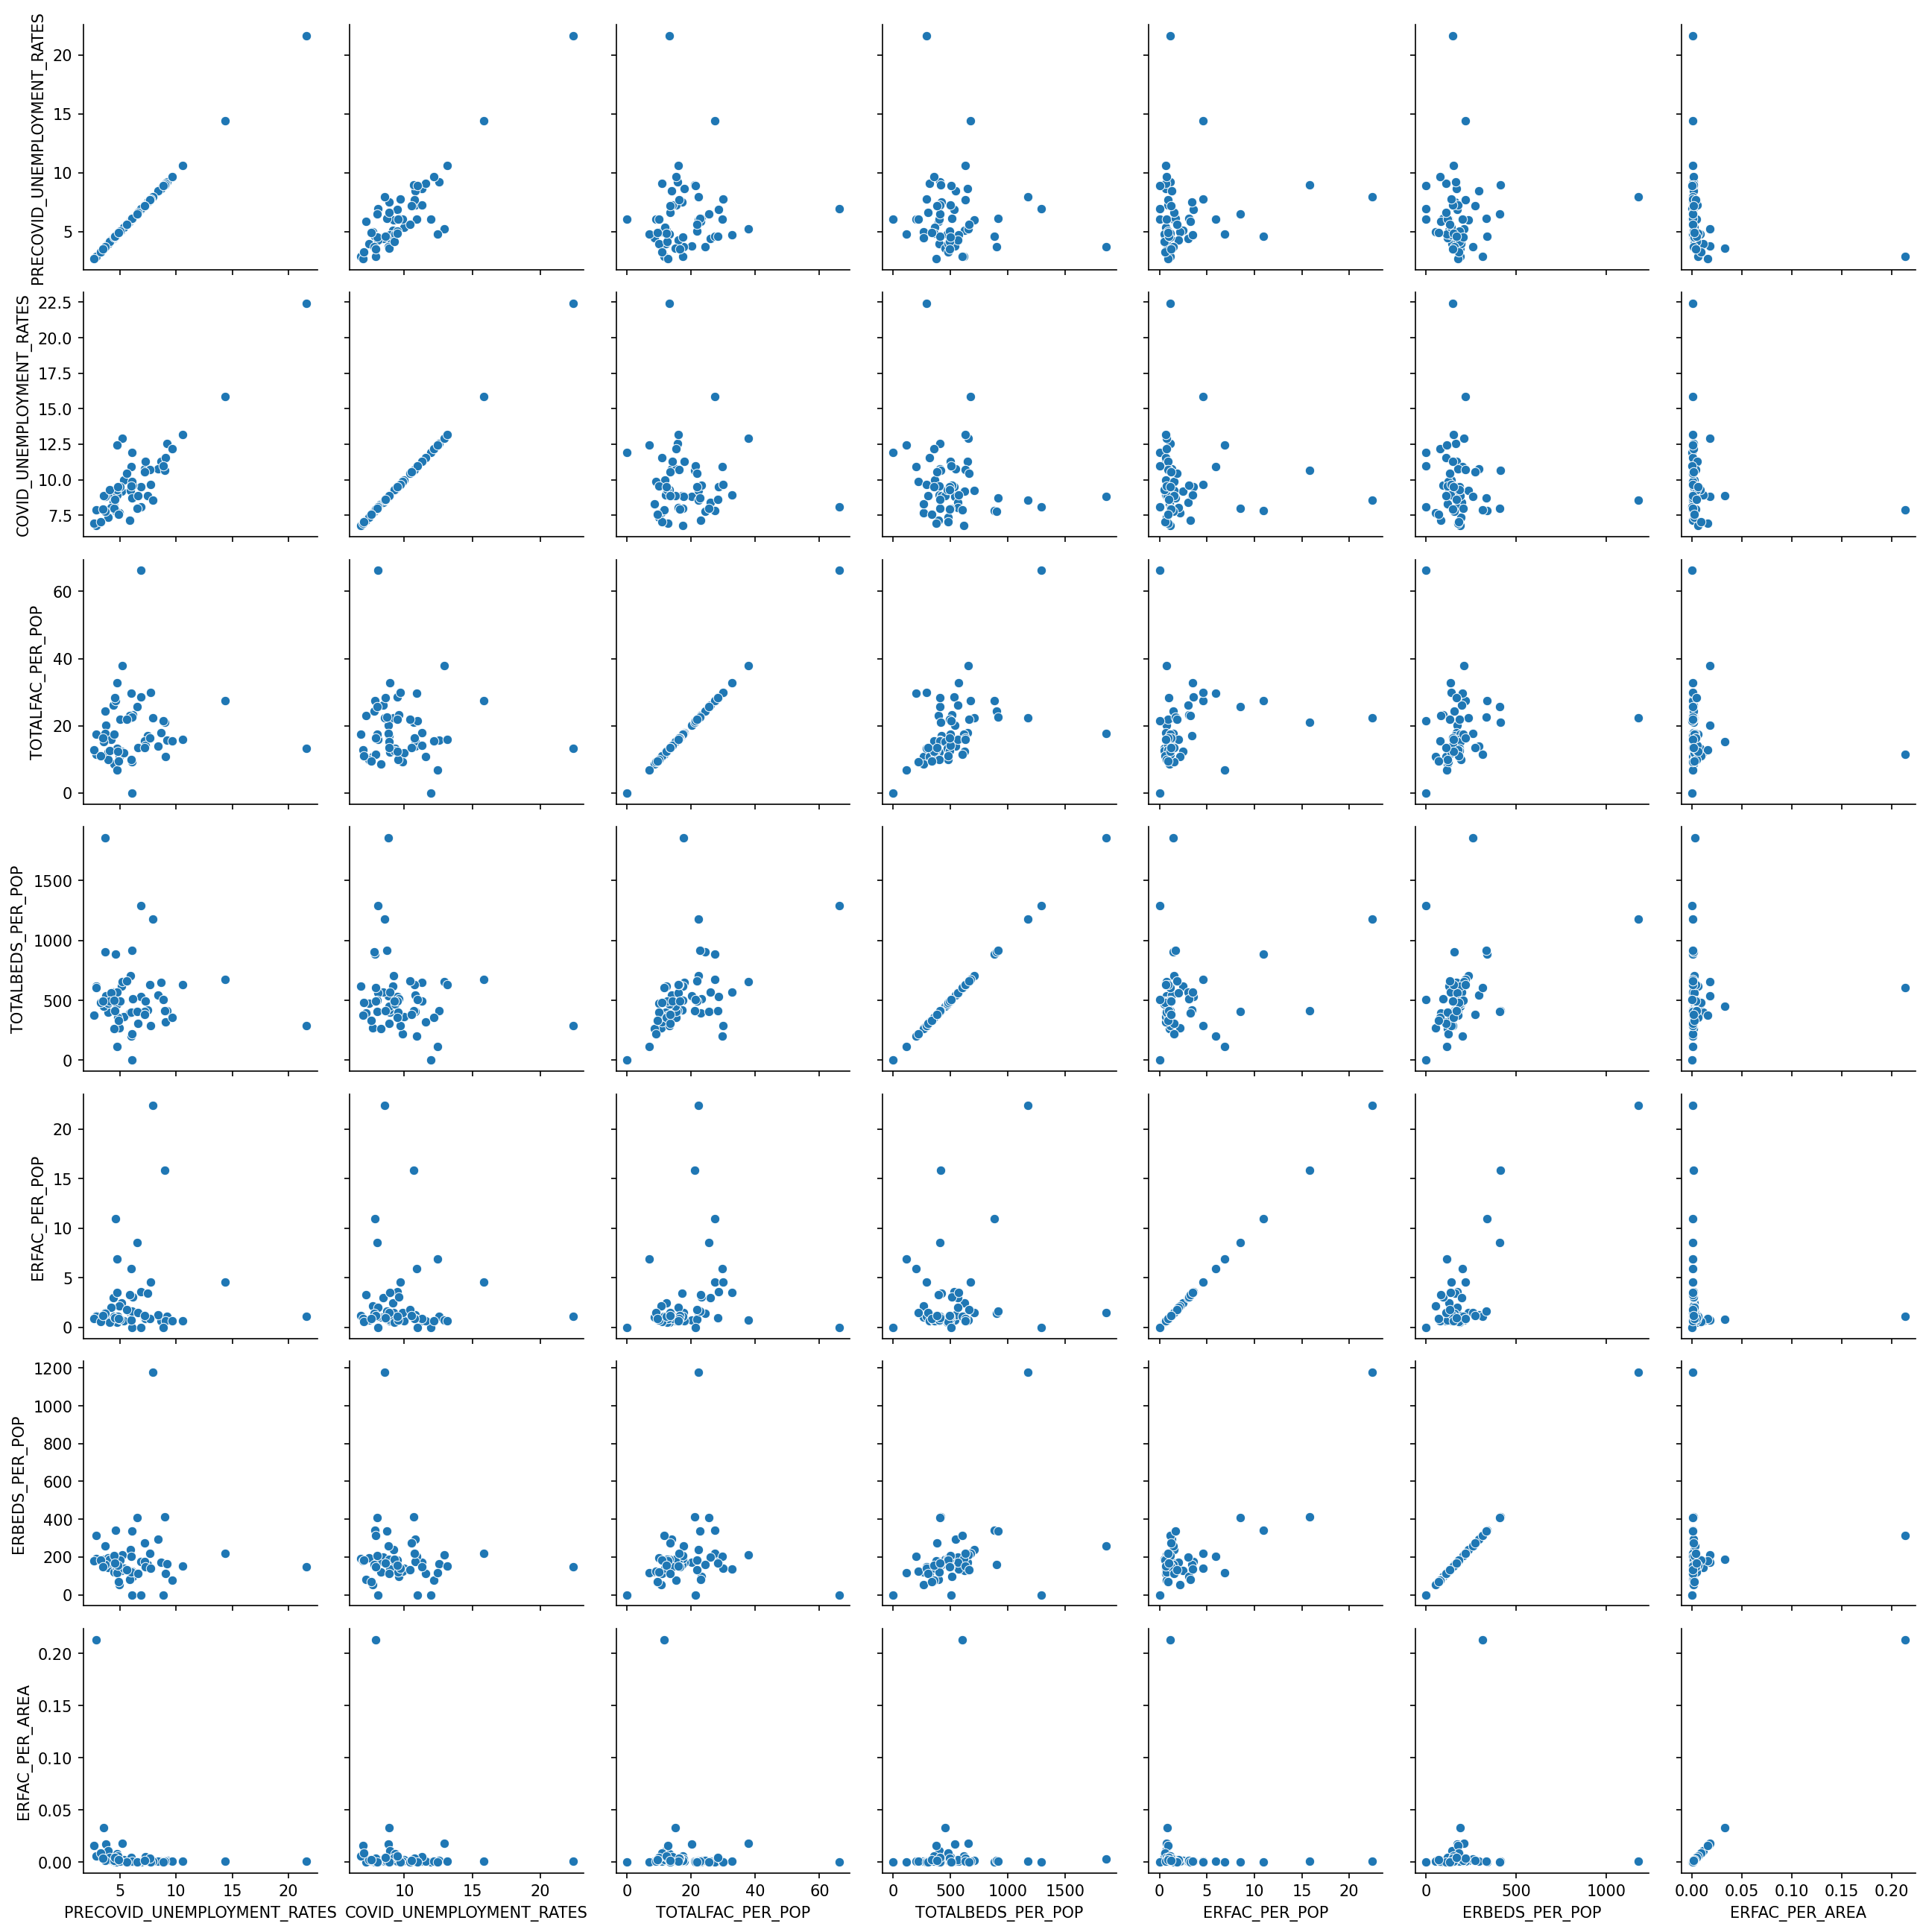

In [13]:
plotting(rate_df)

In [14]:
# Build a function to run a linear regression and plot it using variables in a dataset
def linear_regression(dataframe,variable_x,variable_y):
    ''' This function takes a dataframe and its variables,
    plot a scatter chart, then fit the data in a linear regression model
    Input: dataframe, x variable, y variable
    Output: a scatter plot, regression score, a scatter of predicted value '''

    # plot the data on a scatter chart
    sns.lmplot(x=variable_x,y=variable_y,data=dataframe,order=2,ci=None)

    # run linear regression
    X = np.array(dataframe[variable_x]).reshape(-1,1)
    y = np.array(dataframe[variable_y]).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    score = regr.score(X_test, y_test)
    print("Regression score is %f." % score)

    # plot the predicted data
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test, color ='r')
    plt.plot(X_test, y_pred, color ='b')
    plt.show()

Regression score is -0.242533.


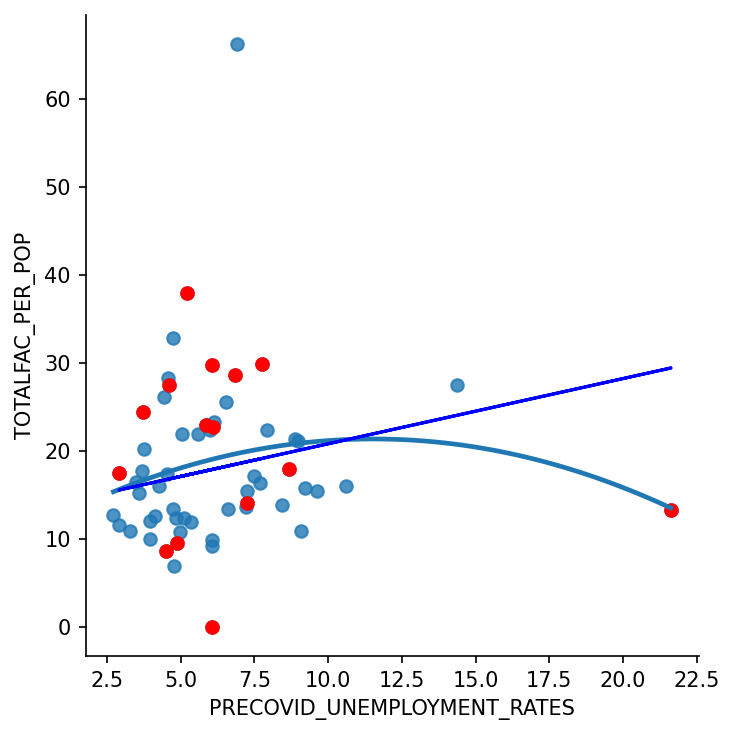

In [15]:
linear_regression(rate_df,"PRECOVID_UNEMPLOYMENT_RATES","TOTALFAC_PER_POP")

Regression score is -0.089822.


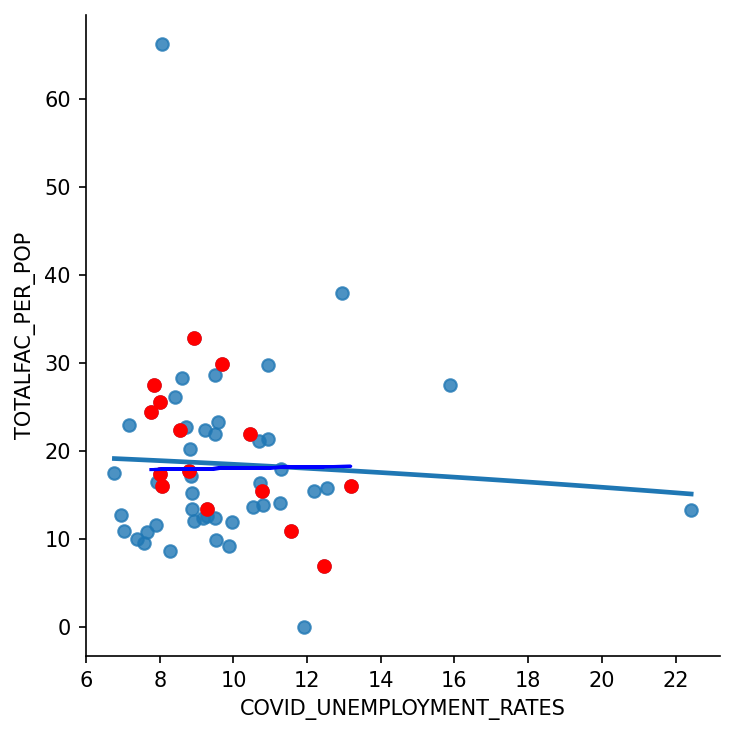

In [16]:
linear_regression(rate_df,"COVID_UNEMPLOYMENT_RATES","TOTALFAC_PER_POP")

Regression score is 0.001249.


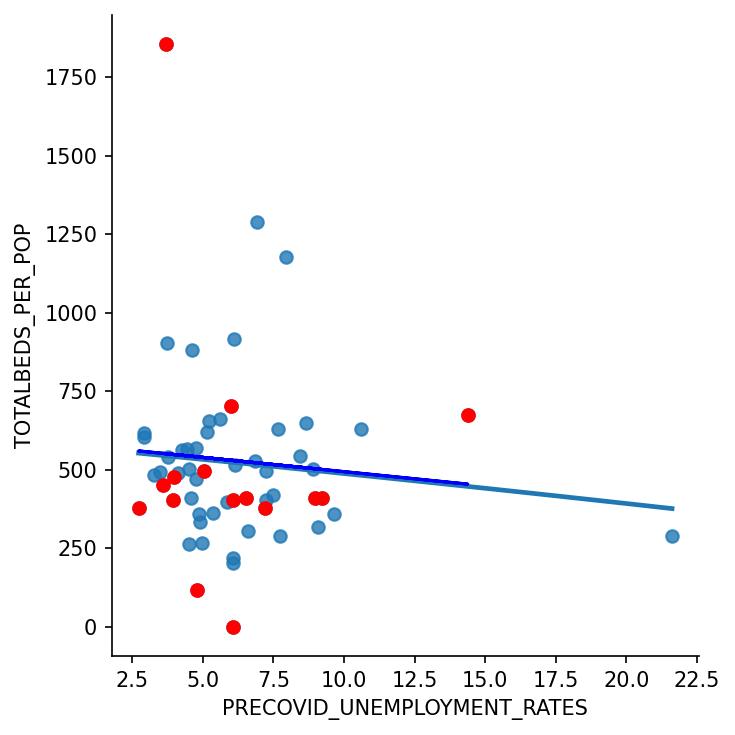

In [17]:
linear_regression(rate_df,"PRECOVID_UNEMPLOYMENT_RATES","TOTALBEDS_PER_POP")

Regression score is -0.232759.


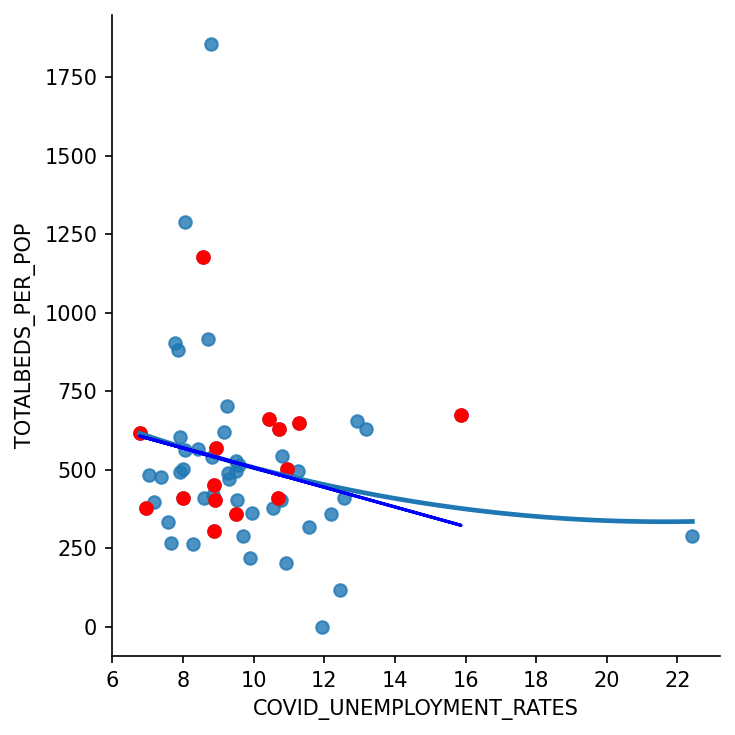

In [18]:
linear_regression(rate_df,"COVID_UNEMPLOYMENT_RATES","TOTALBEDS_PER_POP")

Regression score is -0.181838.


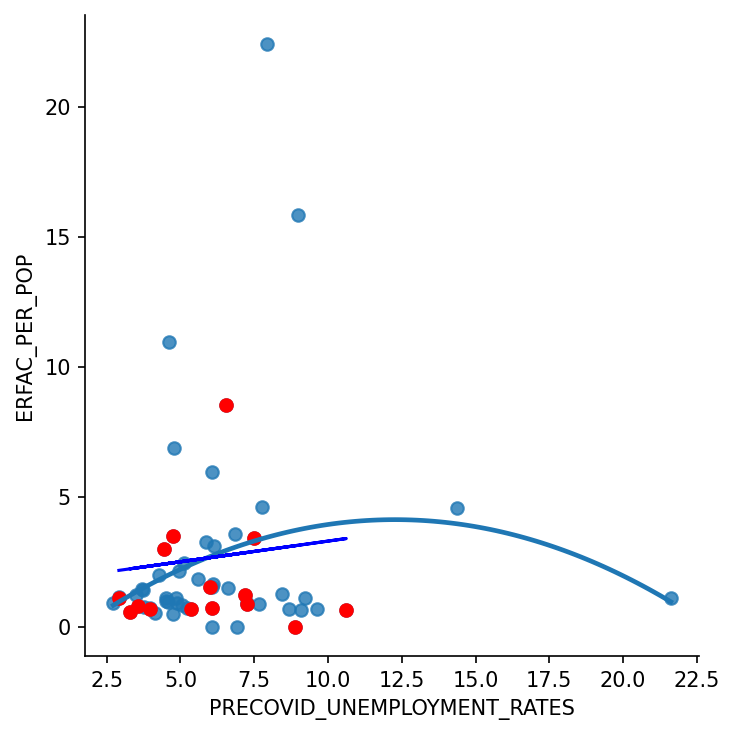

In [19]:
linear_regression(rate_df,"PRECOVID_UNEMPLOYMENT_RATES","ERFAC_PER_POP")

Regression score is -0.021486.


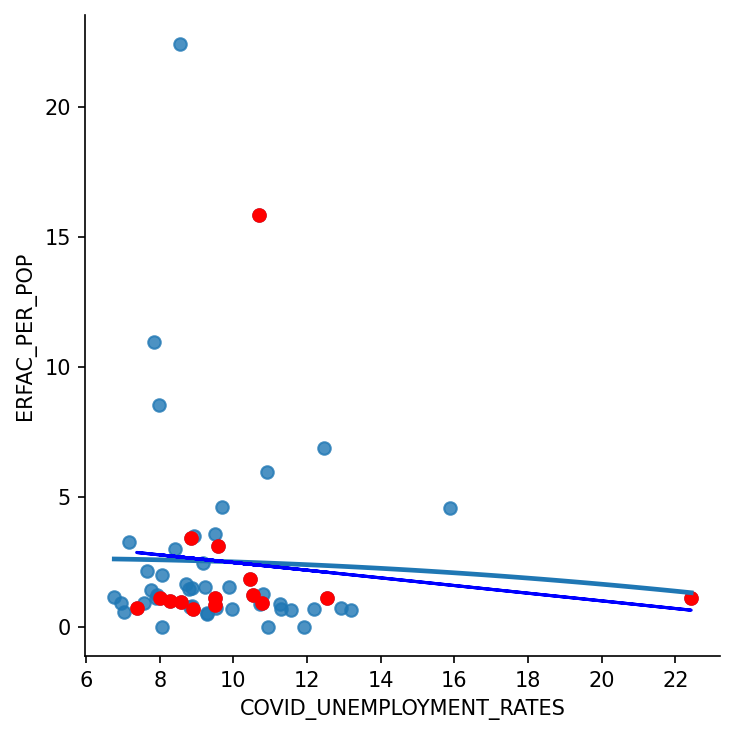

In [20]:
linear_regression(rate_df,"COVID_UNEMPLOYMENT_RATES","ERFAC_PER_POP")

Regression score is -0.040667.


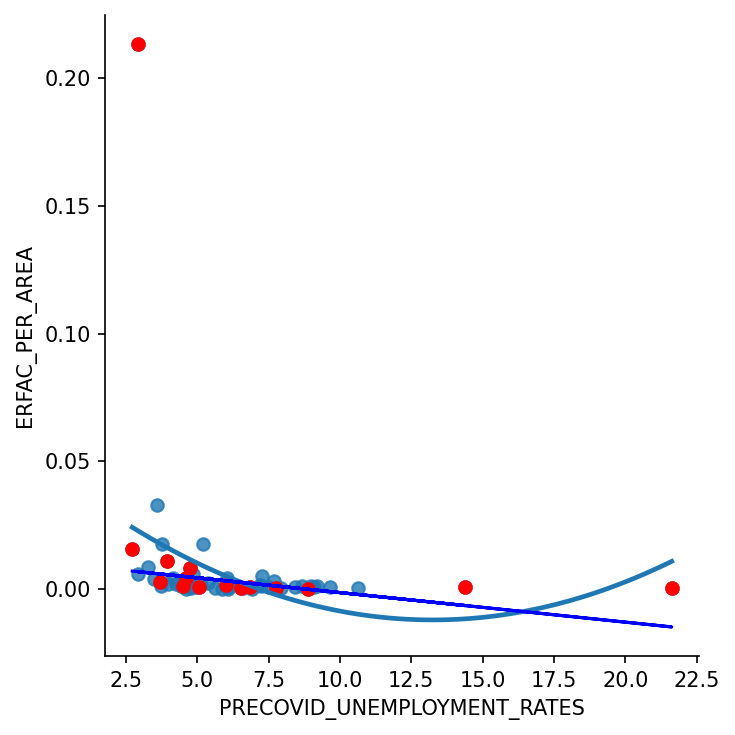

In [21]:
linear_regression(rate_df,"PRECOVID_UNEMPLOYMENT_RATES","ERFAC_PER_AREA")

Regression score is -5.923204.


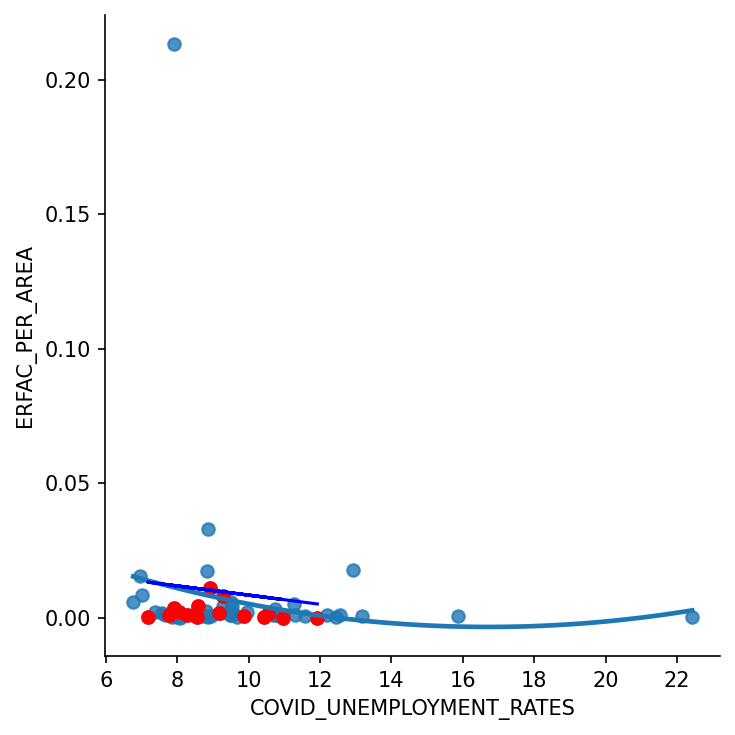

In [22]:
linear_regression(rate_df,"COVID_UNEMPLOYMENT_RATES","ERFAC_PER_AREA")